# Imports

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn_extra.cluster import KMedoids
import numpy as np

In [34]:
data = pd.read_csv(r"creditcardcsvpresent.csv")
data.head()
y = data['Is declined']

In [35]:
data.isnull().sum()

Merchant_id                          0
Transaction date                  3075
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64

In [36]:
y =data.iloc[:,-1] 

In [37]:
y

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
3070    N
3071    N
3072    N
3073    N
3074    N
Name: isFradulent, Length: 3075, dtype: object

In [38]:
data.info

<bound method DataFrame.info of       Merchant_id  Transaction date  Average Amount/transaction/day  \
0      3160040998               NaN                           100.0   
1      3160040998               NaN                           100.0   
2      3160041896               NaN                           185.5   
3      3160141996               NaN                           185.5   
4      3160241992               NaN                           500.0   
...           ...               ...                             ...   
3070   6661273532               NaN                           500.0   
3071   6661273532               NaN                           800.0   
3072   6661273533               NaN                           800.0   
3073   6661273532               NaN                          1500.0   
3074   6661273533               NaN                          1500.0   

      Transaction_amount Is declined  Total Number of declines/day  \
0                 3000.0           N         

In [39]:
data = data.drop(['Transaction date','Merchant_id'],axis = 1)
data = data.replace("Y",1)
data = data.replace("N",0)
data

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,500.0,26000.0,0,0,1,1,800,677.2,6,1
...,...,...,...,...,...,...,...,...,...,...
3070,500.0,11000.0,1,0,0,0,754,585.0,7,0
3071,800.0,0.0,1,0,0,0,754,585.0,7,0
3072,800.0,20800.0,1,0,0,0,754,585.0,7,0
3073,1500.0,12000.0,1,0,1,1,754,585.0,7,0


In [40]:
x = data.iloc[:,:-1]
y= data.iloc[:,-1]
x

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,100.0,3000.0,0,5,1,1,0,0.0,0
1,100.0,4300.0,0,5,1,1,0,0.0,0
2,185.5,4823.0,1,5,0,0,0,0.0,0
3,185.5,5008.5,1,8,0,0,0,0.0,0
4,500.0,26000.0,0,0,1,1,800,677.2,6
...,...,...,...,...,...,...,...,...,...
3070,500.0,11000.0,1,0,0,0,754,585.0,7
3071,800.0,0.0,1,0,0,0,754,585.0,7
3072,800.0,20800.0,1,0,0,0,754,585.0,7
3073,1500.0,12000.0,1,0,1,1,754,585.0,7


# Agglomerative

In [41]:
hc = AgglomerativeClustering(linkage="single", n_clusters = 2 ).fit(x)
y_ = hc.labels_

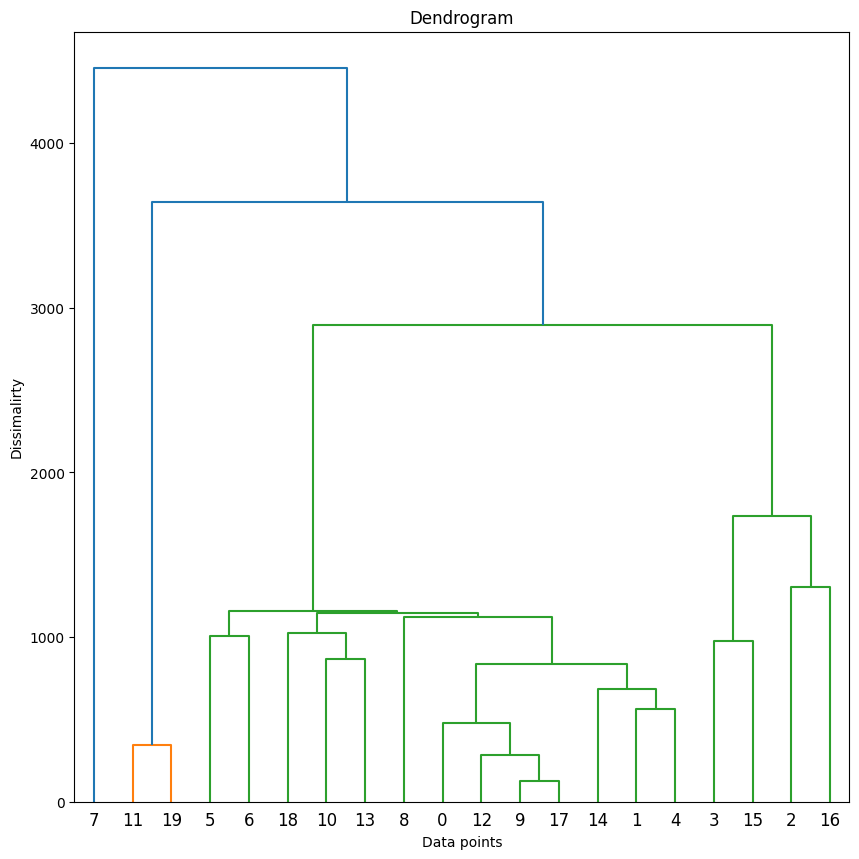

In [42]:
# define linkage 
linked = linkage(x.sample(n=20, random_state=1), 'single')

# set figure size
plt.figure(figsize=(10, 10))

# dendrogram function 
dendrogram(linked,
            orientation='top')

# axis labels
plt.title("Dendrogram")
plt.ylabel("Dissimalirty")
plt.xlabel("Data points")

plt.show()

In [43]:
print ("The accuracy of Agglomerative:", round(metrics.accuracy_score ( y , y_ )*100,2),"%", sep=" " )

The accuracy of Agglomerative: 85.5 %


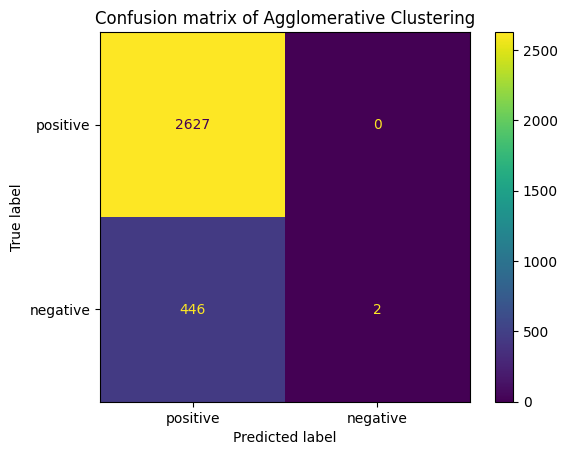

In [100]:
cm = confusion_matrix( y , y_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive","negative"])
disp.plot()
plt.title("Confusion matrix of Agglomerative Clustering")
plt.show()

In [45]:
dict= {'predcited by algorithm': y_,
      'actual': y }

In [82]:
showcase = pd.DataFrame(dict)
showcase.sample(frac=1)

,predcited by algorithm,actual
1774,0,0
1635,0,0
2698,0,0
2193,0,0
803,0,0
...,...,...
1234,0,0
546,0,0
697,0,0
1059,0,0


In [47]:
for i in range(len(y_)):
    if y_[i] ==1:
        print(i)
    elif y_[i] ==2:
        print(i, "other")
    elif y_[i] ==3:
        print(i, "other1")

399
406


# Kmedoids

In [49]:
kmedoids = KMedoids(n_clusters=2).fit(x)

In [50]:
labels = kmedoids.labels_
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
kmedoids.cluster_centers_

array([[6.90703944e+02, 1.72675986e+04, 0.00000000e+00, 2.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.66440856e+02, 3.29796770e+03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [52]:
unq_lab = set(labels)
unq_lab

{0, 1}

In [53]:
y_kmed = kmedoids.fit_predict(x)
y_kmed

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

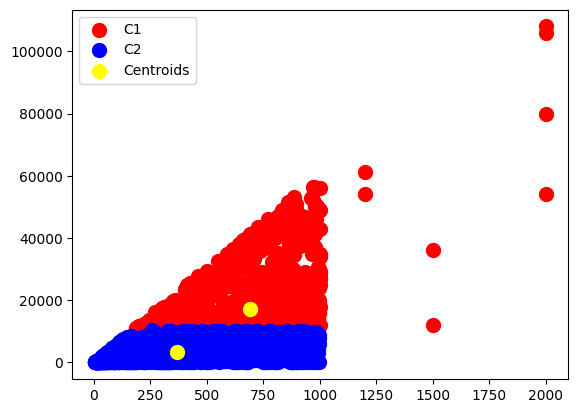

In [54]:
x = x.values
plt.scatter(x[y_kmed == 0, 0], x[y_kmed == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x[y_kmed == 1, 0], x[y_kmed == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [55]:
print ("The accuracy of K-Medoids:", round(metrics.accuracy_score ( y , y_kmed )*100,2),"%", sep=" " )

The accuracy of K-Medoids: 28.98 %


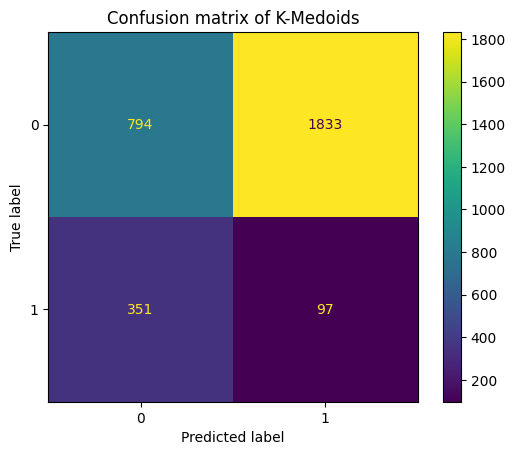

In [91]:
cm = confusion_matrix( y , y_kmed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative"])
disp.plot()
plt.title("Confusion matrix of K-Medoids")
plt.show()

# naive bayes 

In [67]:

X_train , x_test , y_train , y_test = train_test_split ( data ,y , test_size = 0.30 , random_state = 100 )

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train , y_train )
y_pred = gnb.predict( x_test )
print(y_pred )

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 

In [99]:
x_y = []
x_N = []
for i in range(len(x_test)):
    if y_pred[i] == 1:
        x_y.append(x_test.iloc[i,:])
    elif  y_pred[i] == 0:
        x_N.append(x_test.iloc[i,:])
x_y = np.array(x_y)
x_N = np.array(x_N)

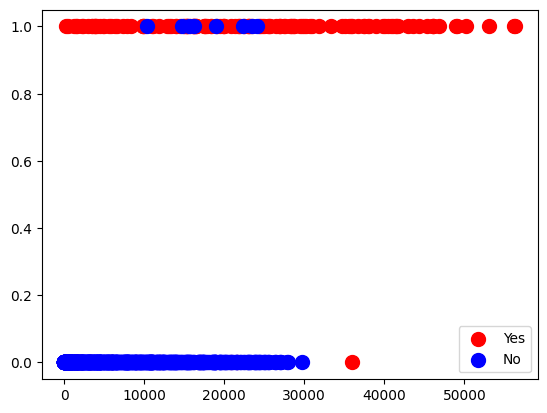

In [98]:
plt.scatter(x_y[:,1], y_test[y_pred == 1], s = 100, c = 'red', label = 'Yes')
plt.scatter(x_N[:,1], y_test[y_pred == 0],s = 100, c = 'blue', label = 'No')
plt.legend()
plt.show()

In [ ]:
print ("The accuracy of naive Bayes:", round(metrics.accuracy_score ( y_test , y_pred )*100,2),"%", sep=" " )

The accuracy of naive Bayes: 96.64 %


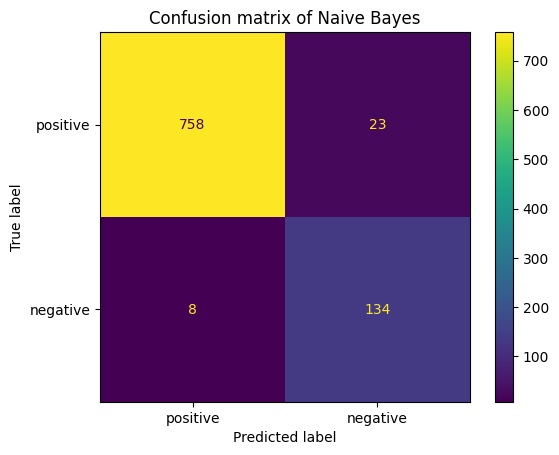

In [96]:
cm = confusion_matrix( y_test , y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative"])
disp.plot()
plt.title("Confusion matrix of Naive Bayes")
plt.show()